In [2]:
from matplotlib import pyplot as plt
import numpy as np 

In [3]:
# each point is length, width, type (0, 1)
data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5,  1,  1],
        [1,    1,  0]]

mystery_flower = [4.5, 1]

In [5]:
# network

#       o  flower type
#      / \  w1, w2, b
#     o   o  length, width

In [6]:
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

In [15]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_p(x):
    # dertivative of sigmoid
    return sigmoid(x) * (1-sigmoid(x))

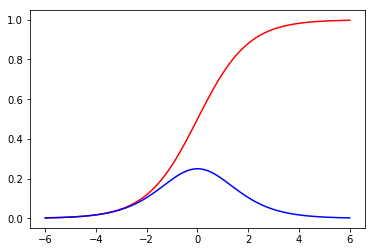

In [17]:
T = np.linspace(-6, 6, 1000)
Y = sigmoid(T)
plt.plot(T, sigmoid(T), c='r')
plt.plot(T, sigmoid_p(T), c='b')

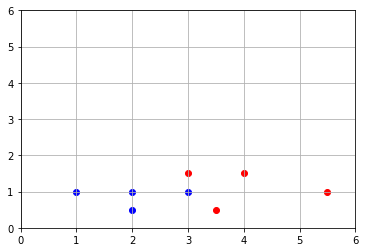

In [23]:
# scatter data
plt.axis([0, 6, 0, 6])
plt.grid()
for i in range(len(data)):
    point = data[i]
    color = "r"
    if point[2] == 0:
        color = "b"
    plt.scatter(point[0], point[1], c=color)

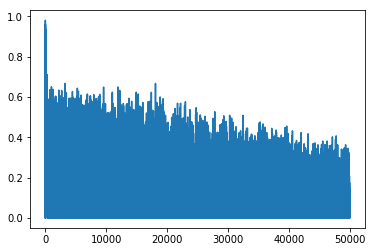

In [45]:
# training loop
# grab on the point randomly
# see what the network output is for it
# use that as part of getting the derivative of the cost
# bring that derivative back to our parameter and update them
# to minimize the cost
# and get the prediction of the network closer to what we want

learning_rate = 0.2
costs = []

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

for i in range(50000):
    random_index = np.random.randint(len(data))
    point = data[random_index]
#     print(point)
    
    # weighted average of the point features
    z = point[0]*w1 + point[1]*w2 + b
    
    # apply activation function (values of h should be between 0 and 1)
    pred = sigmoid(z)
    
    target = point[2]
    cost = np.square(pred-target)
    costs.append(cost)
#     print(cost)
    
#     if i%1000 == 0:
#         print(cost)
    
    # back-propagation
    
    # derivative of prediction
    dcost_pred = 2 * (pred - target)
    
    # derivative of activation function
    dpred_dz = sigmoid_p(z)
    
    # derivative of w1
    dz_dw1 = point[0]
    # derivative of w2
    dz_dw2 = point[1]
    # derivative of b
    dz_db = 1
    
    # chain rule 
    
    # derivative of cost wrt w1
    dcost_dw1 = dcost_pred * dpred_dz * dz_dw1
    
    # derivative of cost wrt w1
    dcost_dw2 = dcost_pred * dpred_dz * dz_dw2
    
    # derivative of cost wrt w1
    dcost_db = dcost_pred * dpred_dz * dz_db
    
    
    # adjusting weights
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db
    
    

plt.plot(costs)

In [48]:
# predictions

for i in range(len(data)):
    point = data[i]
    print(point)
    z = point[0]*w1 + point[1]*w2 + b
    pred = sigmoid(z)
    print("pred: {}".format(pred))

[3, 1.5, 1]
pred: 0.8180545092743295
[2, 1, 0]
pred: 0.0008371863238476766
[4, 1.5, 1]
pred: 0.9997863428605018
[3, 1, 0]
pred: 0.465822406202004
[3.5, 0.5, 1]
pred: 0.845113926904035
[2, 0.5, 0]
pred: 0.000162483420172163
[5.5, 1, 1]
pred: 0.9999999671834314
[1, 1, 0]
pred: 8.050756087944789e-07


In [49]:
z = mystery_flower[0]*w1 + mystery_flower[1]*w2 + b
pred = sigmoid(z)
print("pred: {}".format(pred))

pred: 0.9999658471308426


In [56]:
# now we are using the trained weight matrix
def which_flower(length, width):
    z = length*w1 + width*w2 + b
#     print(z)
    pred = sigmoid(z)
    
    if pred<0.5:
        print("say blue")
    else:
        print("say red")

In [57]:
which_flower(3,   1.5)

say red


In [58]:
which_flower(2,   1)

say blue
